In [285]:
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import numpy as np
import matplotlib.cm as cm
import torchvision.transforms.functional as TF
from PIL import Image
from IPython.display import display 

In [305]:
mesh_name = "table_living_room"
renderer = "sailenv"

mesh = torch.load(f"ts0.20/{mesh_name}.tch")

In [306]:
sal_p3d = mesh["tex_saliency"][renderer].mean(0)

In [307]:
data = pd.DataFrame(np.transpose(sal_p3d.numpy().nonzero()) ,columns=['x','y'])

In [308]:
data

,x,y
0,0,0
1,4,212
2,4,216
3,4,224
4,4,234
...,...,...
30903,336,326
30904,336,327
30905,336,328
30906,336,329


torch.Size([337, 337, 3])
0:337,0:337
torch.Size([337, 337, 3])


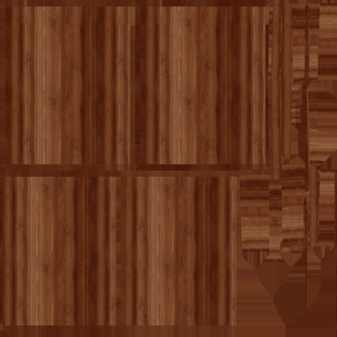

In [309]:
complete_tex = torch.zeros((*sal_p3d.shape, 3))
print(complete_tex.shape)

cur_x = 0
for tex_name, tex in reversed([(a,b) for a,b in mesh['textures'].items()]):
    h,w = tex.shape[:2]
    print(f"{cur_x}:{cur_x+w},0:{h}")
    complete_tex[0:h, cur_x:cur_x+w] = tex
    cur_x = cur_x + w

print(complete_tex.shape)

TF.to_pil_image(complete_tex.permute((2,0,1)))


(1500, 1500)


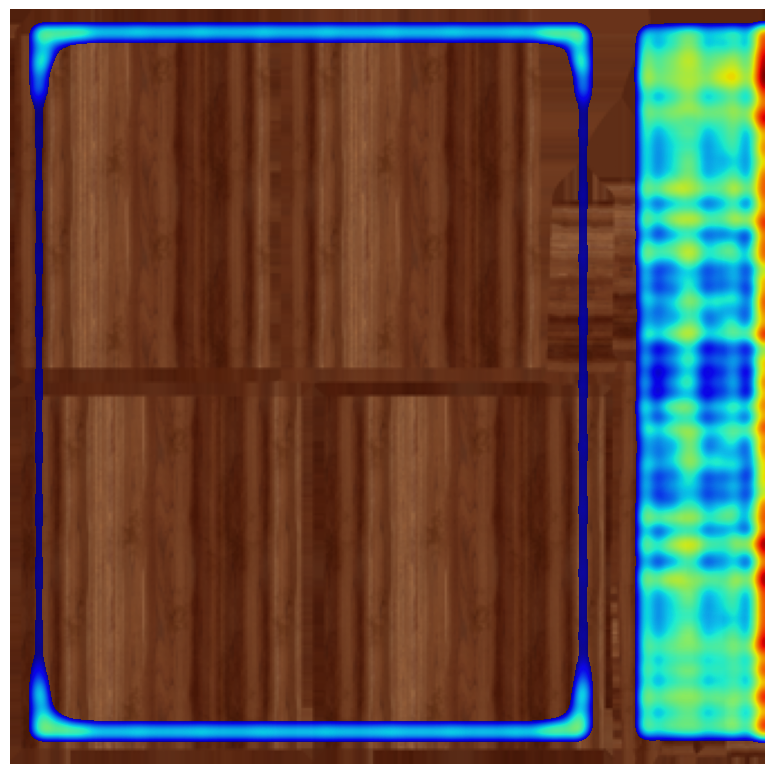

In [310]:
def myplot(x, y, s, bins=1000):

    ranges =[[0, 168], [0, 168]]
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=1500, range= ranges)
    heatmap = gaussian_filter(heatmap, sigma=s)
    print(heatmap.shape)
    # remove 
    lowbound = np.mean(heatmap[heatmap > 0])
    heatmap[heatmap < lowbound] = np.NaN    
    #resize heatmap
    #print(heatmap.shape)
    extent = [  xedges[-1], xedges[0],yedges[-1], yedges[0],]
    return heatmap.T, extent


MY_DPI = 96
IMG_WIDTH = 1000
IMG_HEIGHT = 1000
fig = plt.figure(figsize=(IMG_WIDTH / MY_DPI, IMG_HEIGHT / MY_DPI), dpi=MY_DPI)
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

img = complete_tex.numpy()
plt.imshow(np.flipud(img))

s  = 16
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.axis('off')
#ax.plot(foas7["foay"] , foas7["foax"],'k.', markersize=1)

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim() 

img2, ext = myplot(data["x"], data["y"], s)    
extent = [ xmin, xmax , ymin, ymax]
plt.imshow(np.flipud(img2), extent=extent, origin='upper', cmap=cm.jet, alpha=0.9)
full_tex_path = "tex.png"
plt.savefig(f"./texes/{mesh_name}",  bbox_inches='tight', pad_inches=0)
